In [1]:
import pymongo
import pprint
from pymongo import MongoClient
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Establish a connection to your MongoDB server
client = MongoClient('130.238.28.32', 27017)

In [3]:
#Access the desired collection in your database
db = client.sample_data
collection = db.Test_data

### What are the top 10 programming languages based on the number of projects developed?

In [4]:
#Group the documents by language and count the projects
pipeline = [
    {'$group': {'_id': '$language', 'count': {'$sum': 1}}},
    {'$sort': {'count': -1}},
    {'$limit': 10}
]

In [19]:
#Perform the aggregation query
result = collection.aggregate(pipeline)
#Retrieve and print the top 10 programming languages
languages = []
counts = []
for doc in result:
    languages.append(doc['_id'])
    counts.append(doc['count'])

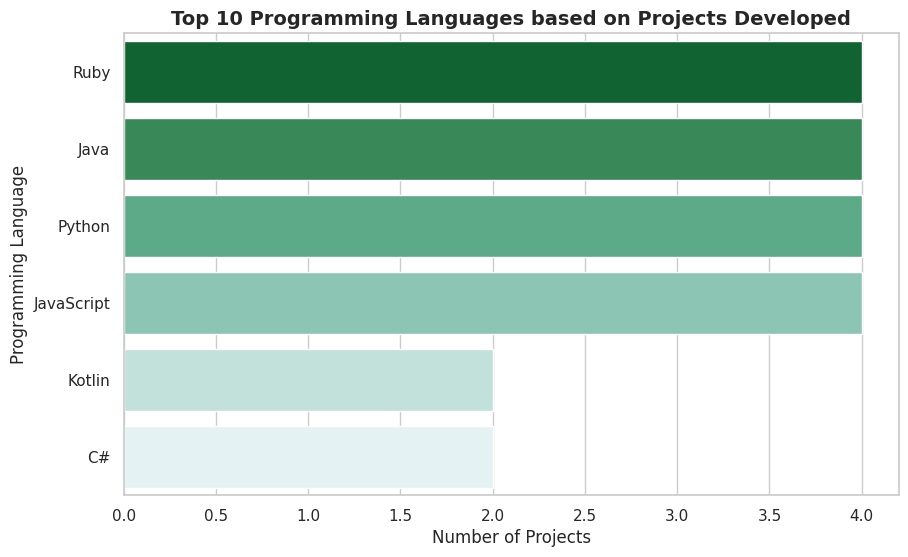

In [25]:
#Set a customized color palette
color_palette = sns.color_palette("Set2", len(languages))
# Create a bar plot using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=counts, y=languages, palette=colors)
plt.xlabel("Number of Projects", fontsize=12)
plt.ylabel("Programming Language", fontsize=12)
plt.title("Top 10 Programming Languages based on Projects Developed", fontsize=14, fontweight='bold')
plt.show()

### What are the top 10 most frequently updated GitHub projects (i.e., most commits in a project)?

In [30]:
# Sort the documents in descending order of commits and retrieve the top 10
top_projects = collection.find().sort('commits', pymongo.DESCENDING).limit(10)
# get the top 10 projects
projects = []
proj_counts = []
for doc in top_projects:
    projects.append(doc['full_name'])
    proj_counts.append(doc['commits'])

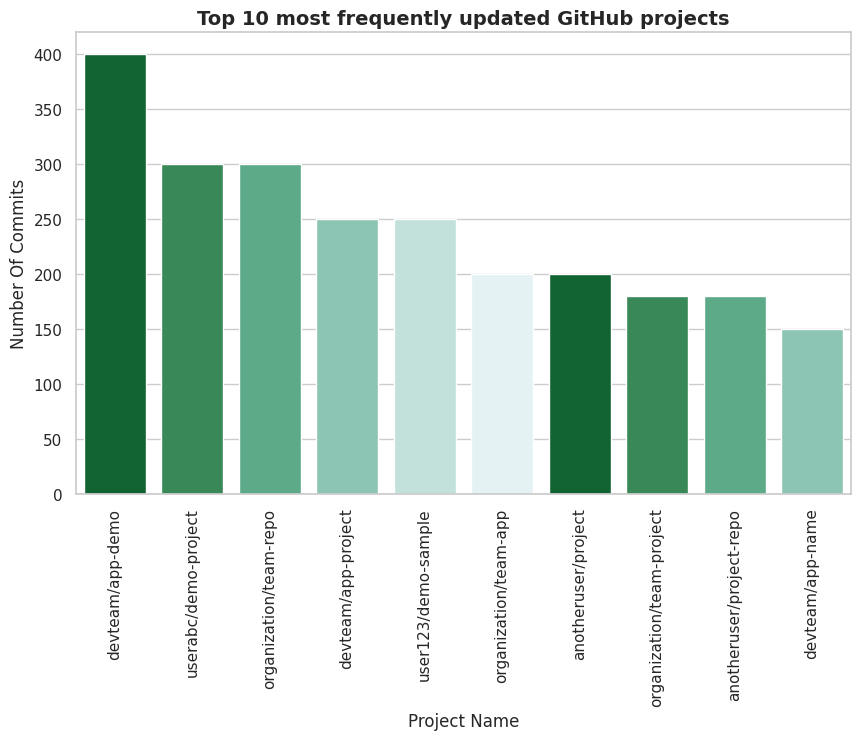

In [33]:
#Set a customized color palette
color_palette = sns.color_palette("Set2", len(languages))
# Create a bar plot using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=projects, y=proj_counts, palette=colors)
plt.xlabel("Project Name", fontsize=12)
plt.ylabel("Number Of Commits", fontsize=12)
plt.title("Top 10 most frequently updated GitHub projects", fontsize=14, fontweight='bold')
plt.xticks(rotation=90)
plt.show()